# 1. Scraping data dari google play store

In [ ]:
!pip install google_play_scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
#mengambil data ulasan bahasa indonesia, berdasarkan paling relevan, dan 50000 data
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.instagram.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=5000, # defaults to 5000
    filter_score_with=None
)

In [ ]:
# membuat data frame
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1a2eb812-68f3-44b6-8ac0-13e1d9c9696b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah refresh terus, foto yg dilihat langsung ...",1,0,215.0.0.27.359,2021-12-09 18:48:35,None,None,215.0.0.27.359
1,3006c0ce-5fbf-4cac-b320-67c33e55cf20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah banyak bug. Di story tuli...,1,0,167.1.0.25.120,2023-11-26 16:09:49,None,None,167.1.0.25.120
2,6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak bug nya dan sampe sekarang belum diperb...,1,8,185.0.0.38.116,2021-05-01 21:57:15,None,None,185.0.0.38.116
3,cef65c5e-de6e-410a-99e0-7cca6699d0ef,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sekarang ko aneh bangett, mau upload story mut...",2,32,358.0.0.0.11,2024-11-12 13:50:44,None,None,358.0.0.0.11
4,cac2be22-1fbd-4e12-a04a-94e1ab4e7d6f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong buat pihak instagram, keluhan pengguna ...",1,2839,353.1.0.47.90,2024-10-18 19:24:20,None,None,353.1.0.47.90


In [ ]:
#data yang dibutuhkan score dan content
my_df = df_busu[[ 'score', 'content']]
my_df.head()

,score,content
0,1,"Mudah refresh terus, foto yg dilihat langsung ..."
1,1,Setelah update malah banyak bug. Di story tuli...
2,1,Banyak bug nya dan sampe sekarang belum diperb...
3,2,"sekarang ko aneh bangett, mau upload story mut..."
4,1,"Tolong buat pihak instagram, keluhan pengguna ..."


In [ ]:
#memastikan jumlah ulasan yang dimabil
len(my_df.index)

5000

In [ ]:
 #menyimpan data dalam bentuk csv
my_df.to_csv("scraping_instagram.csv", index = False)

# 2. Pre Processing

2.1 Case Folding (mengubah huruf kapital menjadi huruf kecil) dan Cleansing (menghilangkan simbol dan angka tidak penting)

ini bener

In [ ]:
#import library
import re
import string

In [ ]:
def clean_text(my_df, text_field, new_text_field_name):
  my_df[new_text_field_name] = my_df[text_field].str.lower() #fungsi case folding mengubah huruf besar ke kecil
  my_df[new_text_field_name] = my_df[new_text_field_name].astype(str) #mengubah tipe data menjadi string
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"[^a-zA-Z0-9]", " ", elem))  #menghilangkan simbol dan angka
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", " ", elem))  #menghilangkan angka
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"http\S+|www\S+|https\S+", "", elem, flags=re.MULTILINE))  # Menghilangkan URL
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"[^a-zA-Z0-9\s]", " ", elem))  # Menghilangkan karakter non-alfabet dan non-numerik
  #tambahan
  # Menghilangkan karakter non-ASCII
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r'[^\x00-\x7F]+', '', elem))
  # Menghilangkan tanda baca (punctuation)
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r'[^\w\s]', '', elem))
     # Menghilangkan tab, newline, dan backslash
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"[\t\n\r\\]+", " ", elem))
    # Menghilangkan spasi di awal dan akhir serta merapikan spasi berlebih menjadi satu spasi
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\s+", " ", elem).strip())

  return my_df

In [ ]:
my_df['case_folding'] = my_df['content'].str.lower()
my_df['case_folding']
data_clean = clean_text(my_df, 'content', 'case_folding')

<ipython-input-10-df14b5fb2fff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['case_folding'] = my_df['content'].str.lower()
<ipython-input-9-0e0824e6626d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df[new_text_field_name] = my_df[text_field].str.lower() #fungsi case folding mengubah huruf besar ke kecil
<ipython-input-9-0e0824e6626d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
data_clean.head(10)

,score,content,case_folding
0,1,"Mudah refresh terus, foto yg dilihat langsung ...",mudah refresh terus foto yg dilihat langsung h...
1,1,Setelah update malah banyak bug. Di story tuli...,setelah update malah banyak bug di story tulis...
2,1,Banyak bug nya dan sampe sekarang belum diperb...,banyak bug nya dan sampe sekarang belum diperb...
3,2,"sekarang ko aneh bangett, mau upload story mut...",sekarang ko aneh bangett mau upload story mute...
4,1,"Tolong buat pihak instagram, keluhan pengguna ...",tolong buat pihak instagram keluhan pengguna d...
5,1,ini Instagram kenapa ya???? setiap buat sorota...,ini instagram kenapa ya setiap buat sorotan ba...
6,5,salah satu aplikasi media sosial favorit aku n...,salah satu aplikasi media sosial favorit aku n...
7,1,"banyak update banyak juga bug, saya udah follo...",banyak update banyak juga bug saya udah follow...
8,4,"Halo, Instagram! Aku mau sampaikan keinginanku...",halo instagram aku mau sampaikan keinginanku d...
9,2,"Makin sini makin banyak bug aplikasi ini, Mau ...",makin sini makin banyak bug aplikasi ini mau l...


2. tokenizing

In [ ]:
#import nltk dan instalasi tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data package
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
data_clean['tokenizing'] = data_clean['case_folding'].apply (lambda x: word_tokenize(x))
data_clean.head(50) #menampilkan 10 data teratas dari 5000 data

<ipython-input-13-136fd1c1a270>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['tokenizing'] = data_clean['case_folding'].apply (lambda x: word_tokenize(x))


,score,content,case_folding,tokenizing
0,1,"Mudah refresh terus, foto yg dilihat langsung ...",mudah refresh terus foto yg dilihat langsung h...,"[mudah, refresh, terus, foto, yg, dilihat, lan..."
1,1,Setelah update malah banyak bug. Di story tuli...,setelah update malah banyak bug di story tulis...,"[setelah, update, malah, banyak, bug, di, stor..."
2,1,Banyak bug nya dan sampe sekarang belum diperb...,banyak bug nya dan sampe sekarang belum diperb...,"[banyak, bug, nya, dan, sampe, sekarang, belum..."
3,2,"sekarang ko aneh bangett, mau upload story mut...",sekarang ko aneh bangett mau upload story mute...,"[sekarang, ko, aneh, bangett, mau, upload, sto..."
4,1,"Tolong buat pihak instagram, keluhan pengguna ...",tolong buat pihak instagram keluhan pengguna d...,"[tolong, buat, pihak, instagram, keluhan, peng..."
5,1,ini Instagram kenapa ya???? setiap buat sorota...,ini instagram kenapa ya setiap buat sorotan ba...,"[ini, instagram, kenapa, ya, setiap, buat, sor..."
6,5,salah satu aplikasi media sosial favorit aku n...,salah satu aplikasi media sosial favorit aku n...,"[salah, satu, aplikasi, media, sosial, favorit..."
7,1,"banyak update banyak juga bug, saya udah follo...",banyak update banyak juga bug saya udah follow...,"[banyak, update, banyak, juga, bug, saya, udah..."
8,4,"Halo, Instagram! Aku mau sampaikan keinginanku...",halo instagram aku mau sampaikan keinginanku d...,"[halo, instagram, aku, mau, sampaikan, keingin..."
9,2,"Makin sini makin banyak bug aplikasi ini, Mau ...",makin sini makin banyak bug aplikasi ini mau l...,"[makin, sini, makin, banyak, bug, aplikasi, in..."


In [ ]:
sorted_data = data_clean[['score', 'tokenizing']]
sorted_data.head()

,score,tokenizing
0,1,"[mudah, refresh, terus, foto, yg, dilihat, lan..."
1,1,"[setelah, update, malah, banyak, bug, di, stor..."
2,1,"[banyak, bug, nya, dan, sampe, sekarang, belum..."
3,2,"[sekarang, ko, aneh, bangett, mau, upload, sto..."
4,1,"[tolong, buat, pihak, instagram, keluhan, peng..."


In [ ]:
sorted_data.to_csv('tokenizing.csv', index = False)

In [ ]:
data_clean.to_csv('preprocessing2.csv', index = False)

3. normalize

In [ ]:
def normalize_text(text, normalization_dict):
    words = word_tokenize(text)  # Tokenize the text
    normalized_words = [normalization_dict.get(word, word) for word in words]  # Replace if found in the dictionary
    return ' '.join(normalized_words)

In [ ]:
normalization_dict = {
    # Slang dan kata informal lainnya
    'gw': 'saya',
    'gue': 'saya',
    'lo': 'kamu',
    'loh': 'kamu',
    'aj': 'aja',
    'sdh': 'sudah',
    'udh': 'sudah',
    'skrg': 'sekarang',
    'dr': 'dari',
    'jg': 'juga',
    'tp': 'tapi',
    'tuh': 'itu',
    'ntar': 'nanti',
    'knp': 'kenapa',
    'bgt': 'banget',
    'gk': 'tidak',
    'gak': 'tidak',
    'gmn': 'gimana',
    'gmana': 'bagaimana',
    'nyesel': 'menyesal',
    'cape': 'capek',
    'makanya': 'maka',
    'ga': 'tidak',
    'aja': 'saja',
    'yg': 'yang',
    'kalo': 'kalau',
    'gabisa': 'tidak bisa',
    'gakbisa': 'tidak bisa',
    'sampe': 'sampai',
    'kali': 'sekali',
    'gimana': 'bagaimana',
    'jangan': 'tidak usah',
    'kebuka': 'terbuka',
    'bisa': 'dapat',
    'nyari': 'mencari',
    'bikin': 'membuat',
    'ni': 'ini',
    'pd': 'pada',
    'omg': 'astaga',
    'mending': 'lebih baik',
    'kudu': 'harus',
    'dikit': 'sedikit',
    'ak': 'saya',
    'sp': 'sepatutnya',
    'trs': 'terus',
    'gile': 'gila',
    'cuma': 'hanya',
    'doang': 'saja',
    'berantakan': 'kacau',
     'anak2': 'anak-anak',
    'main2': 'bermain-main',
    'bener': 'benar',
    'berasa': 'terasa',
    'kejadian': 'peristiwa',
    'dah': 'sudah',
    'kasihan': 'iba',
    'yakin': 'percaya',
    'utk': 'untuk',
    'jgn': 'jangan',
    'tetep': 'tetap',
    'dong': 'dong',
    'ngaku': 'mengakui',
    'bareng': 'bersama',
    'knpa': 'kenapa',
    'nyesek': 'sesak',
    'pdhal': 'padahal',
    'nyantai': 'santai',
    'jl': 'jalan',
    'cepet': 'cepat',
    'bingung': 'kebingungan',
    'nemu': 'menemukan',
    'receh': 'tidak penting',
    'recode': 'rekam ulang',
    'mantul': 'hebat',
    'ngeliat': 'melihat',
    'bagus': 'baik',
    'jaring': 'saringan',
    'gagal': 'tidak berhasil',
    'seneng': 'senang',
    'galau': 'gundah',
    'kepencet': 'tertekan',
    'keren': 'menarik',
    'ajg': 'anjing',
    'enak': 'nyaman',
    'bang': 'saudara',
    'bro': 'saudara',
    'sis': 'saudari',
    'tambahin': 'tambahkan',
    'kenceng': 'cepat',
    'abis': 'habis',
    'gw': 'saya',
    'yg': 'yang',
    'tau': 'tahu',
    'trus': 'terus',
    'berat': 'sulit',
    'auto': 'otomatis',
    'skip': 'lewati',
    'baik': 'bagus',
    'ngomong': 'berbicara',
    'udah': 'sudah',

    # Kata umum dalam bahasa Inggris yang sering dipakai di bahasa Indonesia informal
    'ig': 'instagram',
    'sg': 'cerita',
    'apk': 'aplikasi',
    'vidio': 'video',
    'dm': 'pesan',
    'bug': 'kesalahan',
    'refresh': 'segarkan',
    'post': 'unggah',
    'close friend': 'teman dekat',
    'repost': 'unggah ulang',
    'filter': 'penyaring',
    'reels': 'putaran',
    'play store': 'toko aplikasi',
    'black screen': 'layar hitam',
    'login': 'masuk',
    'logout': 'keluar',
    'monetisasi': 'penghasilan',
    'konten': 'isi',
    'creator': 'pencipta',
    'postingan': 'unggahan',
    'collab': 'kolaborasi',
    'fitur': 'fungsi',
    'performa': 'kinerja',
    'feedback': 'umpan balik',
    'like': 'suka',
    'comment': 'komentar',
    'share': 'bagikan',
    'follow': 'ikuti',
    'unfollow': 'hentikan',
    'response': 'respon',
    'highlight': 'sorotan',
    'lag': 'lambat',
    'download': 'unduh',
    'upload': 'unggah',
    'klik': 'tekan',
    'hape': 'telepon',

    # Frasa umum
    'thank you': 'terima kasih',
    'thanks': 'terima kasih',
    'terimakasih': 'terima kasih',
    'mantap': 'hebat',
    'sangat': 'sungguh',
    'aku': 'saya',
    'biar': 'agar',

    # Tambahan khusus berdasarkan token di ulasan
    'trus': 'trs',
    'pls': 'plis',
    'thx': 'terima kasih',
    'cmn': 'cuman',
    'msh': 'masih',
    'mls': 'males',
    'suka suka': 'terserah',
    'kesel bgt': 'sangat kesal',
    'gk jelas': 'tidak jelas',
    'app': 'aplikasi',
    'gue nyesel': 'saya menyesal',
    'lag': 'lambat',
    'lelet': 'lambat',
    'refreshing': 'penyegaran',
    'ngehang': 'berhenti bekerja',
    'gokil': 'keren',
    'bt': 'bosan',
    'bgt': 'banget',
    'tulisan': 'teks',
    'respon': 'tanggapan',
    'cs': 'customer service',
    'akun': 'akun',
    'musik': 'lagu',
    'terkadang': 'kadang',
    'sahabat': 'teman',
    'lagu': 'musik',
    'cerita': 'story',
    'dll': 'dan lain-lain',
    'banget': 'sangat',
    'story': 'cerita',
}

In [ ]:
# Menyimpan kamus normalisasi dalam format yang sesuai
normalization_word_dict = {}  # Define normalization_word_dict before the loop
for index, row in normalization_dict.items():
    normalization_word_dict[index] = row

# Fungsi untuk normalisasi kata
def normalize_token(word, normalization_word_dict):
    return normalization_word_dict.get(word, word)  # Ganti dengan bentuk normal atau tetap

# Menggunakan tokenisasi dan normalisasi
data_clean['normalized'] = data_clean['case_folding'].apply(
    lambda x: [normalize_token(word, normalization_word_dict) for word in word_tokenize(x)]
)

# Menampilkan 10 baris pertama untuk melihat hasil
data_clean.head(10)

<ipython-input-19-7e91cff0bab7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['normalized'] = data_clean['case_folding'].apply(


,score,content,case_folding,tokenizing,normalized
0,1,"Mudah refresh terus, foto yg dilihat langsung ...",mudah refresh terus foto yg dilihat langsung h...,"[mudah, refresh, terus, foto, yg, dilihat, lan...","[mudah, segarkan, terus, foto, yang, dilihat, ..."
1,1,Setelah update malah banyak bug. Di story tuli...,setelah update malah banyak bug di story tulis...,"[setelah, update, malah, banyak, bug, di, stor...","[setelah, update, malah, banyak, kesalahan, di..."
2,1,Banyak bug nya dan sampe sekarang belum diperb...,banyak bug nya dan sampe sekarang belum diperb...,"[banyak, bug, nya, dan, sampe, sekarang, belum...","[banyak, kesalahan, nya, dan, sampai, sekarang..."
3,2,"sekarang ko aneh bangett, mau upload story mut...",sekarang ko aneh bangett mau upload story mute...,"[sekarang, ko, aneh, bangett, mau, upload, sto...","[sekarang, ko, aneh, bangett, mau, unggah, cer..."
4,1,"Tolong buat pihak instagram, keluhan pengguna ...",tolong buat pihak instagram keluhan pengguna d...,"[tolong, buat, pihak, instagram, keluhan, peng...","[tolong, buat, pihak, instagram, keluhan, peng..."
5,1,ini Instagram kenapa ya???? setiap buat sorota...,ini instagram kenapa ya setiap buat sorotan ba...,"[ini, instagram, kenapa, ya, setiap, buat, sor...","[ini, instagram, kenapa, ya, setiap, buat, sor..."
6,5,salah satu aplikasi media sosial favorit aku n...,salah satu aplikasi media sosial favorit aku n...,"[salah, satu, aplikasi, media, sosial, favorit...","[salah, satu, aplikasi, media, sosial, favorit..."
7,1,"banyak update banyak juga bug, saya udah follo...",banyak update banyak juga bug saya udah follow...,"[banyak, update, banyak, juga, bug, saya, udah...","[banyak, update, banyak, juga, kesalahan, saya..."
8,4,"Halo, Instagram! Aku mau sampaikan keinginanku...",halo instagram aku mau sampaikan keinginanku d...,"[halo, instagram, aku, mau, sampaikan, keingin...","[halo, instagram, saya, mau, sampaikan, keingi..."
9,2,"Makin sini makin banyak bug aplikasi ini, Mau ...",makin sini makin banyak bug aplikasi ini mau l...,"[makin, sini, makin, banyak, bug, aplikasi, in...","[makin, sini, makin, banyak, kesalahan, aplika..."


stopword removal (sastrawi dan nltk)

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
# Mengunduh stopwords dari NLTK
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('indonesian'))

# Mendapatkan stopwords dari Sastrawi
factory = StopWordRemoverFactory()
sastrawi_stopwords = set(factory.get_stop_words())

# Menggabungkan kedua daftar stopwords
combined_stopwords = nltk_stopwords.union(sastrawi_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Menghapus stopwords
data_clean['stopword_removal'] = data_clean['normalized'].apply(
    lambda x: [word for word in x if word not in combined_stopwords]
)

<ipython-input-23-953f53997397>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['stopword_removal'] = data_clean['normalized'].apply(


In [ ]:
data_clean.head(10)

,score,content,case_folding,tokenizing,normalized,stopword_removal
0,1,"Mudah refresh terus, foto yg dilihat langsung ...",mudah refresh terus foto yg dilihat langsung h...,"[mudah, refresh, terus, foto, yg, dilihat, lan...","[mudah, segarkan, terus, foto, yang, dilihat, ...","[mudah, segarkan, foto, langsung, hilang, keba..."
1,1,Setelah update malah banyak bug. Di story tuli...,setelah update malah banyak bug di story tulis...,"[setelah, update, malah, banyak, bug, di, stor...","[setelah, update, malah, banyak, kesalahan, di...","[update, kesalahan, cerita, teks, nya, lagu, t..."
2,1,Banyak bug nya dan sampe sekarang belum diperb...,banyak bug nya dan sampe sekarang belum diperb...,"[banyak, bug, nya, dan, sampe, sekarang, belum...","[banyak, kesalahan, nya, dan, sampai, sekarang...","[kesalahan, nya, diperbaiki, report, customer ..."
3,2,"sekarang ko aneh bangett, mau upload story mut...",sekarang ko aneh bangett mau upload story mute...,"[sekarang, ko, aneh, bangett, mau, upload, sto...","[sekarang, ko, aneh, bangett, mau, unggah, cer...","[ko, aneh, bangett, unggah, cerita, muter, jar..."
4,1,"Tolong buat pihak instagram, keluhan pengguna ...",tolong buat pihak instagram keluhan pengguna d...,"[tolong, buat, pihak, instagram, keluhan, peng...","[tolong, buat, pihak, instagram, keluhan, peng...","[instagram, keluhan, pengguna, tanggapin, tida..."
5,1,ini Instagram kenapa ya???? setiap buat sorota...,ini instagram kenapa ya setiap buat sorotan ba...,"[ini, instagram, kenapa, ya, setiap, buat, sor...","[ini, instagram, kenapa, ya, setiap, buat, sor...","[instagram, sorotan, plus, sampul, nya, loadin..."
6,5,salah satu aplikasi media sosial favorit aku n...,salah satu aplikasi media sosial favorit aku n...,"[salah, satu, aplikasi, media, sosial, favorit...","[salah, satu, aplikasi, media, sosial, favorit...","[salah, aplikasi, media, sosial, favorit, apli..."
7,1,"banyak update banyak juga bug, saya udah follo...",banyak update banyak juga bug saya udah follow...,"[banyak, update, banyak, juga, bug, saya, udah...","[banyak, update, banyak, juga, kesalahan, saya...","[update, kesalahan, ikuti, teman, le, hentikan..."
8,4,"Halo, Instagram! Aku mau sampaikan keinginanku...",halo instagram aku mau sampaikan keinginanku d...,"[halo, instagram, aku, mau, sampaikan, keingin...","[halo, instagram, saya, mau, sampaikan, keingi...","[halo, instagram, keinginanku, aplikasi, insta..."
9,2,"Makin sini makin banyak bug aplikasi ini, Mau ...",makin sini makin banyak bug aplikasi ini mau l...,"[makin, sini, makin, banyak, bug, aplikasi, in...","[makin, sini, makin, banyak, kesalahan, aplika...","[kesalahan, aplikasi, liat, cerita, loadingnya..."


Stemming

In [ ]:
# Import StemmerFactory from Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # This line imports the missing StemmerFactory


In [ ]:
# Membuat objek stemmer Sastrawi
factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}
for document in data_clean['stopword_removal']:
  for term in document:
    if term not in term_dict:
      term_dict[term] = ' '

for term in term_dict:
  term_dict[term] = stemmed_wrapper(term)

def get_stemmed_term(document):
  return [term_dict[term] for term in document]

data_clean['stemming'] = data_clean['stopword_removal'].apply(lambda x: get_stemmed_term(x))

<ipython-input-26-681d9c7edcb8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['stemming'] = data_clean['stopword_removal'].apply(lambda x: get_stemmed_term(x))


In [ ]:
data_clean.head(10)

,score,content,case_folding,tokenizing,normalized,stopword_removal,stemming
0,1,"Mudah refresh terus, foto yg dilihat langsung ...",mudah refresh terus foto yg dilihat langsung h...,"[mudah, refresh, terus, foto, yg, dilihat, lan...","[mudah, segarkan, terus, foto, yang, dilihat, ...","[mudah, segarkan, foto, langsung, hilang, keba...","[mudah, segar, foto, langsung, hilang, bawah, ..."
1,1,Setelah update malah banyak bug. Di story tuli...,setelah update malah banyak bug di story tulis...,"[setelah, update, malah, banyak, bug, di, stor...","[setelah, update, malah, banyak, kesalahan, di...","[update, kesalahan, cerita, teks, nya, lagu, t...","[update, salah, cerita, teks, nya, lagu, temu,..."
2,1,Banyak bug nya dan sampe sekarang belum diperb...,banyak bug nya dan sampe sekarang belum diperb...,"[banyak, bug, nya, dan, sampe, sekarang, belum...","[banyak, kesalahan, nya, dan, sampai, sekarang...","[kesalahan, nya, diperbaiki, report, customer ...","[salah, nya, baik, report, customer service, n..."
3,2,"sekarang ko aneh bangett, mau upload story mut...",sekarang ko aneh bangett mau upload story mute...,"[sekarang, ko, aneh, bangett, mau, upload, sto...","[sekarang, ko, aneh, bangett, mau, unggah, cer...","[ko, aneh, bangett, unggah, cerita, muter, jar...","[ko, aneh, bangett, unggah, cerita, muter, jar..."
4,1,"Tolong buat pihak instagram, keluhan pengguna ...",tolong buat pihak instagram keluhan pengguna d...,"[tolong, buat, pihak, instagram, keluhan, peng...","[tolong, buat, pihak, instagram, keluhan, peng...","[instagram, keluhan, pengguna, tanggapin, tida...","[instagram, keluh, guna, tanggapin, tidak usah..."
5,1,ini Instagram kenapa ya???? setiap buat sorota...,ini instagram kenapa ya setiap buat sorotan ba...,"[ini, instagram, kenapa, ya, setiap, buat, sor...","[ini, instagram, kenapa, ya, setiap, buat, sor...","[instagram, sorotan, plus, sampul, nya, loadin...","[instagram, sorot, plus, sampul, nya, loading,..."
6,5,salah satu aplikasi media sosial favorit aku n...,salah satu aplikasi media sosial favorit aku n...,"[salah, satu, aplikasi, media, sosial, favorit...","[salah, satu, aplikasi, media, sosial, favorit...","[salah, aplikasi, media, sosial, favorit, apli...","[salah, aplikasi, media, sosial, favorit, apli..."
7,1,"banyak update banyak juga bug, saya udah follo...",banyak update banyak juga bug saya udah follow...,"[banyak, update, banyak, juga, bug, saya, udah...","[banyak, update, banyak, juga, kesalahan, saya...","[update, kesalahan, ikuti, teman, le, hentikan...","[update, salah, ikut, teman, le, henti, ulang,..."
8,4,"Halo, Instagram! Aku mau sampaikan keinginanku...",halo instagram aku mau sampaikan keinginanku d...,"[halo, instagram, aku, mau, sampaikan, keingin...","[halo, instagram, saya, mau, sampaikan, keingi...","[halo, instagram, keinginanku, aplikasi, insta...","[halo, instagram, ingin, aplikasi, instagram, ..."
9,2,"Makin sini makin banyak bug aplikasi ini, Mau ...",makin sini makin banyak bug aplikasi ini mau l...,"[makin, sini, makin, banyak, bug, aplikasi, in...","[makin, sini, makin, banyak, kesalahan, aplika...","[kesalahan, aplikasi, liat, cerita, loadingnya...","[salah, aplikasi, liat, cerita, loadingnya, si..."


In [ ]:
data_clean['text'] = data_clean['stemming']

# menghapus kolom "stemming" agar hanya kolom "text" yang tersisa:
#data_clean = data_clean.drop(columns=['stemming'])

# Menampilkan DataFrame yang sudah diperbarui
data_clean.head(10)

<ipython-input-28-dc791aa1cc39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['text'] = data_clean['stemming']


,score,content,case_folding,tokenizing,normalized,stopword_removal,stemming,text
0,1,"Mudah refresh terus, foto yg dilihat langsung ...",mudah refresh terus foto yg dilihat langsung h...,"[mudah, refresh, terus, foto, yg, dilihat, lan...","[mudah, segarkan, terus, foto, yang, dilihat, ...","[mudah, segarkan, foto, langsung, hilang, keba...","[mudah, segar, foto, langsung, hilang, bawah, ...","[mudah, segar, foto, langsung, hilang, bawah, ..."
1,1,Setelah update malah banyak bug. Di story tuli...,setelah update malah banyak bug di story tulis...,"[setelah, update, malah, banyak, bug, di, stor...","[setelah, update, malah, banyak, kesalahan, di...","[update, kesalahan, cerita, teks, nya, lagu, t...","[update, salah, cerita, teks, nya, lagu, temu,...","[update, salah, cerita, teks, nya, lagu, temu,..."
2,1,Banyak bug nya dan sampe sekarang belum diperb...,banyak bug nya dan sampe sekarang belum diperb...,"[banyak, bug, nya, dan, sampe, sekarang, belum...","[banyak, kesalahan, nya, dan, sampai, sekarang...","[kesalahan, nya, diperbaiki, report, customer ...","[salah, nya, baik, report, customer service, n...","[salah, nya, baik, report, customer service, n..."
3,2,"sekarang ko aneh bangett, mau upload story mut...",sekarang ko aneh bangett mau upload story mute...,"[sekarang, ko, aneh, bangett, mau, upload, sto...","[sekarang, ko, aneh, bangett, mau, unggah, cer...","[ko, aneh, bangett, unggah, cerita, muter, jar...","[ko, aneh, bangett, unggah, cerita, muter, jar...","[ko, aneh, bangett, unggah, cerita, muter, jar..."
4,1,"Tolong buat pihak instagram, keluhan pengguna ...",tolong buat pihak instagram keluhan pengguna d...,"[tolong, buat, pihak, instagram, keluhan, peng...","[tolong, buat, pihak, instagram, keluhan, peng...","[instagram, keluhan, pengguna, tanggapin, tida...","[instagram, keluh, guna, tanggapin, tidak usah...","[instagram, keluh, guna, tanggapin, tidak usah..."
5,1,ini Instagram kenapa ya???? setiap buat sorota...,ini instagram kenapa ya setiap buat sorotan ba...,"[ini, instagram, kenapa, ya, setiap, buat, sor...","[ini, instagram, kenapa, ya, setiap, buat, sor...","[instagram, sorotan, plus, sampul, nya, loadin...","[instagram, sorot, plus, sampul, nya, loading,...","[instagram, sorot, plus, sampul, nya, loading,..."
6,5,salah satu aplikasi media sosial favorit aku n...,salah satu aplikasi media sosial favorit aku n...,"[salah, satu, aplikasi, media, sosial, favorit...","[salah, satu, aplikasi, media, sosial, favorit...","[salah, aplikasi, media, sosial, favorit, apli...","[salah, aplikasi, media, sosial, favorit, apli...","[salah, aplikasi, media, sosial, favorit, apli..."
7,1,"banyak update banyak juga bug, saya udah follo...",banyak update banyak juga bug saya udah follow...,"[banyak, update, banyak, juga, bug, saya, udah...","[banyak, update, banyak, juga, kesalahan, saya...","[update, kesalahan, ikuti, teman, le, hentikan...","[update, salah, ikut, teman, le, henti, ulang,...","[update, salah, ikut, teman, le, henti, ulang,..."
8,4,"Halo, Instagram! Aku mau sampaikan keinginanku...",halo instagram aku mau sampaikan keinginanku d...,"[halo, instagram, aku, mau, sampaikan, keingin...","[halo, instagram, saya, mau, sampaikan, keingi...","[halo, instagram, keinginanku, aplikasi, insta...","[halo, instagram, ingin, aplikasi, instagram, ...","[halo, instagram, ingin, aplikasi, instagram, ..."
9,2,"Makin sini makin banyak bug aplikasi ini, Mau ...",makin sini makin banyak bug aplikasi ini mau l...,"[makin, sini, makin, banyak, bug, aplikasi, in...","[makin, sini, makin, banyak, kesalahan, aplika...","[kesalahan, aplikasi, liat, cerita, loadingnya...","[salah, aplikasi, liat, cerita, loadingnya, si...","[salah, aplikasi, liat, cerita, loadingnya, si..."


In [ ]:
sorted_df = data_clean[['score', 'text']]
sorted_df.head()

,score,text
0,1,"[mudah, segar, foto, langsung, hilang, bawah, ..."
1,1,"[update, salah, cerita, teks, nya, lagu, temu,..."
2,1,"[salah, nya, baik, report, customer service, n..."
3,2,"[ko, aneh, bangett, unggah, cerita, muter, jar..."
4,1,"[instagram, keluh, guna, tanggapin, tidak usah..."


In [ ]:
#menyatukan ulasan perkata menjadi satu kalimat
sorted_df['text'] = sorted_df['text'].apply(lambda x: ' '.join(x))

<ipython-input-30-7667cf328bee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_df['text'] = sorted_df['text'].apply(lambda x: ' '.join(x))


In [ ]:
data_clean.to_csv('TextPreprocessingInstagram.csv', index = False)

In [ ]:
sorted_df.to_csv('TextPreprocessingInstagram2.csv', index = False)

Translator

In [ ]:
!pip install googletrans==3.1.0a0
from googletrans import Translator

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=8ee406146d5a4aa72d5fdc1143d48c2bb31905ea83b25f8b40d959052b366359
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

In [ ]:
import pandas as pd
import googletrans
from googletrans import Translator

In [ ]:
sorted_df = pd.read_csv('TextPreprocessingInstagram2.csv')
sorted_df.head(10)

,score,text
0,1,mudah segar foto langsung hilang bawah cari su...
1,1,update salah cerita teks nya lagu temu cerita ...
2,1,salah nya baik report customer service nya mas...
3,2,ko aneh bangett unggah cerita muter jaring par...
4,1,instagram keluh guna tanggapin tidak usah angg...
5,1,instagram sorot plus sampul nya loading nya ba...
6,5,salah aplikasi media sosial favorit aplikasi b...
7,1,update salah ikut teman le henti ulang ulang k...
8,4,halo instagram ingin aplikasi instagram lagu s...
9,2,salah aplikasi liat cerita loadingnya sinyal b...


In [ ]:
# Inisialisasi Translator
translator = Translator()

# Membaca DataFrame
sorted_df = pd.read_csv('TextPreprocessingInstagram2.csv')

# Menerjemahkan kolom 'text'
translations = {}
for text in sorted_df['text']:
    if text not in translations:
        # Menerjemahkan teks ke bahasa Inggris (atau bahasa target yang diinginkan)
        translated_text = translator.translate(text, dest='en').text
        translations[text] = translated_text

# Mengganti teks asli dengan terjemahan
sorted_df['text'] = sorted_df['text'].replace(translations)


In [ ]:
sorted_df.replace(translations, inplace=True)
sorted_df.head(10)

,score,text
0,1,"easy, fresh, photos immediately disappear at t..."
1,1,"the update is wrong, the text of the story, th..."
2,1,"it's wrong, it's good, report the customer ser..."
3,2,How come it's so strange to upload a story tha...
4,1,"Instagram complains to respond, don't worry, I..."
5,1,instagram spotlight plus the cover is loading ...
6,5,one of your favorite social media applications...
7,1,wrong update follow friend le stop restarting ...
8,4,hello instagram want the instagram app story s...
9,2,"wrong application, see the story loading, the ..."


In [ ]:
sorted_df.to_csv('Translate.csv', index = False)

In [ ]:
import pandas as pd
def load_data():
  data = pd.read_csv('Translate.csv')
  return data

In [ ]:
text_df = load_data()
text_df.head()

,score,text
0,1,"easy, fresh, photos immediately disappear at t..."
1,1,"the update is wrong, the text of the story, th..."
2,1,"it's wrong, it's good, report the customer ser..."
3,2,How come it's so strange to upload a story tha...
4,1,"Instagram complains to respond, don't worry, I..."


#analisis sentimen vader

In [ ]:
#lexocion based
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
text_df['text'] = text_df['text'].astype(str)

analyser = SentimentIntensityAnalyzer()
scores = [analyser.polarity_scores(x) for x in text_df['text']]
print(scores)
text_df['Compound_score'] = [x['compound'] for x in scores]

[{'neg': 0.214, 'neu': 0.607, 'pos': 0.18, 'compound': -0.1027}, {'neg': 0.101, 'neu': 0.712, 'pos': 0.188, 'compound': 0.6124}, {'neg': 0.152, 'neu': 0.7, 'pos': 0.149, 'compound': -0.0516}, {'neg': 0.201, 'neu': 0.705, 'pos': 0.094, 'compound': -0.5658}, {'neg': 0.179, 'neu': 0.642, 'pos': 0.179, 'compound': 0.0015}, {'neg': 0.237, 'neu': 0.703, 'pos': 0.06, 'compound': -0.7239}, {'neg': 0.153, 'neu': 0.463, 'pos': 0.384, 'compound': 0.8176}, {'neg': 0.317, 'neu': 0.556, 'pos': 0.127, 'compound': -0.5859}, {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.7351}, {'neg': 0.054, 'neu': 0.875, 'pos': 0.07, 'compound': 0.1531}, {'neg': 0.071, 'neu': 0.89, 'pos': 0.04, 'compound': -0.25}, {'neg': 0.077, 'neu': 0.634, 'pos': 0.289, 'compound': 0.7184}, {'neg': 0.15, 'neu': 0.766, 'pos': 0.083, 'compound': -0.3328}, {'neg': 0.422, 'neu': 0.355, 'pos': 0.223, 'compound': -0.8643}, {'neg': 0.093, 'neu': 0.848, 'pos': 0.059, 'compound': -0.0772}, {'neg': 0.182, 'neu': 0.486, 'pos': 0.331,

In [ ]:
text_df.head()

,score,text,Compound_score
0,1,"easy, fresh, photos immediately disappear at t...",-0.1027
1,1,"the update is wrong, the text of the story, th...",0.6124
2,1,"it's wrong, it's good, report the customer ser...",-0.0516
3,2,How come it's so strange to upload a story tha...,-0.5658
4,1,"Instagram complains to respond, don't worry, I...",0.0015


In [ ]:
text_df.loc[text_df['Compound_score'] > 0.05, 'Sentiment'] = 'Positive'
text_df.loc[text_df['Compound_score'] < -0.05, 'Sentiment'] = 'Negative'
text_df.loc[(text_df['Compound_score'] >= -0.05) & (text_df['Compound_score'] <= 0.05), 'Sentiment'] = 'Neutral'
text_df.head()

,score,text,Compound_score,Sentiment
0,1,"easy, fresh, photos immediately disappear at t...",-0.1027,Negative
1,1,"the update is wrong, the text of the story, th...",0.6124,Positive
2,1,"it's wrong, it's good, report the customer ser...",-0.0516,Negative
3,2,How come it's so strange to upload a story tha...,-0.5658,Negative
4,1,"Instagram complains to respond, don't worry, I...",0.0015,Neutral


In [ ]:
text_df.to_csv('SentimentLabeledInstagram1.csv', index = False)

In [ ]:
#mengembalikan ke bahasa indonesia
translator = Translator()
translations = {}
data['review'] = data['text'].apply(translator.translate, src='en', dest='id').apply(getattr, args=('text',))
data

visualisasi sebaran data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Muat data yang sudah dilabeli
file_path = '/content/SentimentLabeledInstagram1.csv'
data = pd.read_csv(file_path)

In [ ]:
# Mengatur gaya untuk visualisasi
sns.set(style="whitegrid")

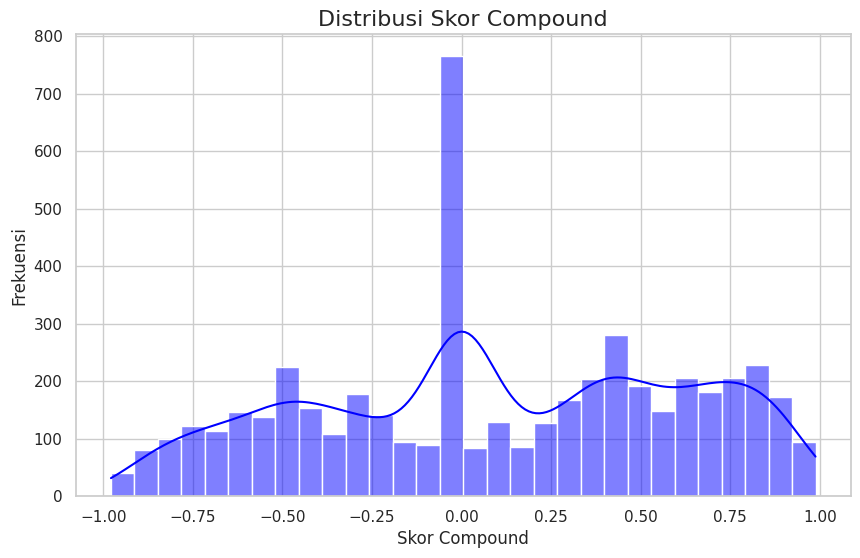

In [ ]:
# 1. Histogram untuk distribusi Skor Compound
plt.figure(figsize=(10, 6))
sns.histplot(data['Compound_score'], bins=30, kde=True, color='blue')
plt.title('Distribusi Skor Compound', fontsize=16)
plt.xlabel('Skor Compound', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

<ipython-input-51-a445c1596453>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='Set2')


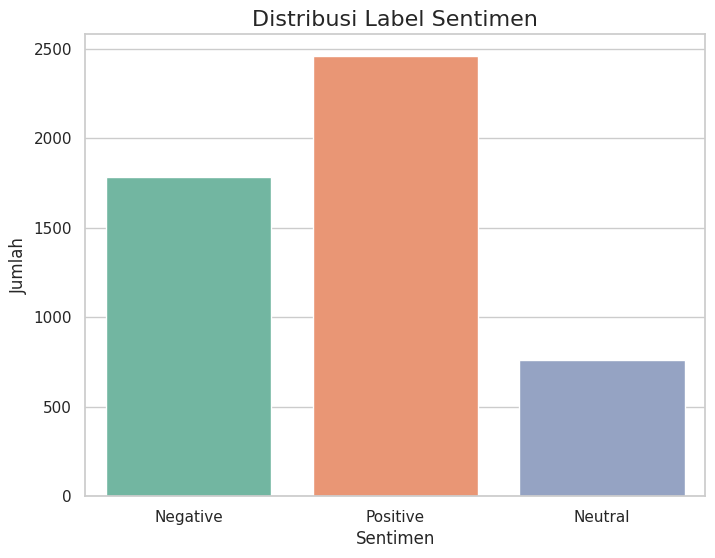

In [ ]:
# 2. Bar Plot untuk Distribusi Label Sentimen
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, palette='Set2')
plt.title('Distribusi Label Sentimen', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

Pembobotan TF-IDF

In [ ]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Memeriksa jumlah dokumen
print("Number of documents:", len(data_clean['text']))

# Menghitung frekuensi kata
all_words = ' '.join([str(item) for item in data_clean['text']]).split()
word_counts = Counter(all_words)
print("Most common words before TF-IDF:")
print(word_counts.most_common(10))  # Menampilkan 10 kata paling umum

# Inisialisasi TF-IDF Vectorizer dengan smoothing
max_features = 5000
tfidf_vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1, 1), smooth_idf=True)

# Mengubah teks menjadi representasi TF-IDF
tfidf_mat = tfidf_vectorizer.fit_transform(data_clean['text'].astype(str)).toarray()

# Mendapatkan IDF
IDF_vector = tfidf_vectorizer.idf_

# Menampilkan bentuk matriks TF-IDF dan IDF
print("Shape of TF-IDF matrix:", tfidf_mat.shape)
print("IDF values:", IDF_vector)

Number of documents: 5000
Most common words before TF-IDF:
[("'instagram',", 2488), ("'nya',", 1527), ("'akun',", 1470), ("'fungsi',", 1198), ("'salah',", 944), ("'cerita',", 915), ("'aplikasi',", 884), ("'video',", 732), ("'update',", 731), ("'unggah',", 724)]
Shape of TF-IDF matrix: (5000, 5000)
IDF values: [8.82424599 8.82424599 8.82424599 ... 8.82424599 8.82424599 7.57148302]


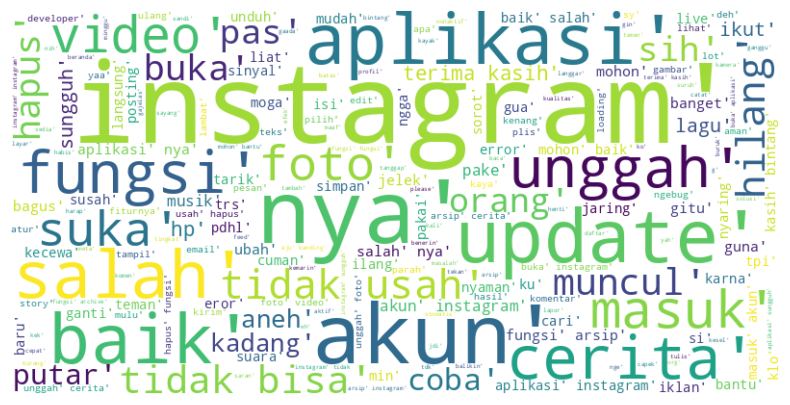

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks untuk visualisasi
all_text = ' '.join([str(item) for item in data_clean['text']])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

klasifikasi SVC

In [ ]:
# Muat data yang sudah dilabeli
file_path = '/content/SentimentLabeledInstagram1.csv'
data = pd.read_csv(file_path)

In [ ]:
data_clean['data_fixed'] = data_clean['text'].apply(lambda tokens: ' '.join(tokens))

<ipython-input-61-f36cba0b007c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['data_fixed'] = data_clean['text'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
# Definisikan fitur dan label
X = data_clean['data_fixed']  # Kolom teks yang sudah diterjemahkan
y = data['Sentiment']  # Kolom label yang dihasilkan dari VADER

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Transformasi data menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Latih model Naive Bayes
model = SVC(kernel='rbf')
model.fit(X_train_tfidf, y_train)

# Prediksi dengan data uji
y_pred = model.predict(X_test_tfidf)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))

print('Matriks Kebingungan:')
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.72
Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.73      0.72      0.73       352
     Neutral       0.64      0.10      0.18       136
    Positive       0.71      0.88      0.79       512

    accuracy                           0.72      1000
   macro avg       0.69      0.57      0.56      1000
weighted avg       0.71      0.72      0.68      1000

Matriks Kebingungan:
[[255   2  95]
 [ 37  14  85]
 [ 58   6 448]]


TAMBAHAN SETELAH BIMIBINGAN
---MENGGUNAKAN WORD2VEC---

In [ ]:
#mengunakan gensim
import pandas as pd
from collections import Counter
from gensim.models import Word2Vec
import numpy as np

# Memeriksa jumlah dokumen
print("Number of documents:", len(data_clean['text']))

# Menghitung frekuensi kata
all_words = ' '.join([str(item) for item in data_clean['text']]).split()
word_counts = Counter(all_words)
print("Most common words before TF-IDF:")
print(word_counts.most_common(10))  # Menampilkan 10 kata paling umum

# Inisialisasi Word2Vec model
model = Word2Vec(sentences=data_clean['text'], vector_size=100, window=5, min_count=5, workers=4)

# Mendapatkan vektor kata untuk setiap kata dalam kamus
word_vectors = model.wv

# Mendapatkan matriks representasi Word2Vec untuk setiap dokumen
document_vectors = []
for document in data_clean['text']:
    # document is already a list of words, so no need to split
    #document_words = document.split()
    document_words = document # Assign document directly as it is already a list
    # Check if any words in the document are in the vocabulary
    valid_words = [word for word in document_words if word in word_vectors]
    if valid_words:  # If there are valid words in the document
        document_vector = np.mean([word_vectors[word] for word in valid_words], axis=0)
        document_vectors.append(document_vector)
    else:  # If no words in the document are in the vocabulary
        document_vectors.append(np.zeros(model.vector_size)) # Append a vector of zeros


# Menampilkan bentuk matriks Word2Vec
print("Shape of Word2Vec matrix:", np.array(document_vectors).shape)

Number of documents: 5000
Most common words before TF-IDF:
[("'instagram',", 2488), ("'nya',", 1527), ("'akun',", 1470), ("'fungsi',", 1198), ("'salah',", 944), ("'cerita',", 915), ("'aplikasi',", 884), ("'video',", 732), ("'update',", 731), ("'unggah',", 724)]
Shape of Word2Vec matrix: (5000, 100)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definisikan fitur dan label
X = data_clean['data_fixed']  # Kolom teks yang sudah diterjemahkan
y = data['Sentiment']  # Kolom label yang dihasilkan dari VADER

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Transformasi data menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Latih model Naive Bayes
model = SVC(kernel='rbf')
model.fit(X_train_tfidf, y_train)

# Prediksi dengan data uji
y_pred = model.predict(X_test_tfidf)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))

print('Matriks Kebingungan:')
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.72
Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.76      0.70      0.73       336
     Neutral       0.71      0.14      0.24       142
    Positive       0.71      0.90      0.79       522

    accuracy                           0.72      1000
   macro avg       0.73      0.58      0.58      1000
weighted avg       0.73      0.72      0.69      1000

Matriks Kebingungan:
[[234   2 100]
 [ 29  20  93]
 [ 46   6 470]]


Klasifikasi naive bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
# Transformasi data menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Latih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Prediksi dengan data uji
y_pred = model.predict(X_test_tfidf)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))

print('Matriks Kebingungan:')
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.65
Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.68      0.54      0.60       352
     Neutral       0.00      0.00      0.00       136
    Positive       0.64      0.90      0.75       512

    accuracy                           0.65      1000
   macro avg       0.44      0.48      0.45      1000
weighted avg       0.57      0.65      0.59      1000

Matriks Kebingungan:
[[191   0 161]
 [ 36   0 100]
 [ 53   0 459]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
data_clean.head()

,score,content,case_folding,tokenizing,normalized,stopword_removal,stemming,text,data_fixed
0,1,"Mudah refresh terus, foto yg dilihat langsung ...",mudah refresh terus foto yg dilihat langsung h...,"[mudah, refresh, terus, foto, yg, dilihat, lan...","[mudah, segarkan, terus, foto, yang, dilihat, ...","[mudah, segarkan, foto, langsung, hilang, keba...","[mudah, segar, foto, langsung, hilang, bawah, ...","[mudah, segar, foto, langsung, hilang, bawah, ...",mudah segar foto langsung hilang bawah cari su...
1,1,Setelah update malah banyak bug. Di story tuli...,setelah update malah banyak bug di story tulis...,"[setelah, update, malah, banyak, bug, di, stor...","[setelah, update, malah, banyak, kesalahan, di...","[update, kesalahan, cerita, teks, nya, lagu, t...","[update, salah, cerita, teks, nya, lagu, temu,...","[update, salah, cerita, teks, nya, lagu, temu,...",update salah cerita teks nya lagu temu cerita ...
2,1,Banyak bug nya dan sampe sekarang belum diperb...,banyak bug nya dan sampe sekarang belum diperb...,"[banyak, bug, nya, dan, sampe, sekarang, belum...","[banyak, kesalahan, nya, dan, sampai, sekarang...","[kesalahan, nya, diperbaiki, report, customer ...","[salah, nya, baik, report, customer service, n...","[salah, nya, baik, report, customer service, n...",salah nya baik report customer service nya mas...
3,2,"sekarang ko aneh bangett, mau upload story mut...",sekarang ko aneh bangett mau upload story mute...,"[sekarang, ko, aneh, bangett, mau, upload, sto...","[sekarang, ko, aneh, bangett, mau, unggah, cer...","[ko, aneh, bangett, unggah, cerita, muter, jar...","[ko, aneh, bangett, unggah, cerita, muter, jar...","[ko, aneh, bangett, unggah, cerita, muter, jar...",ko aneh bangett unggah cerita muter jaring par...
4,1,"Tolong buat pihak instagram, keluhan pengguna ...",tolong buat pihak instagram keluhan pengguna d...,"[tolong, buat, pihak, instagram, keluhan, peng...","[tolong, buat, pihak, instagram, keluhan, peng...","[instagram, keluhan, pengguna, tanggapin, tida...","[instagram, keluh, guna, tanggapin, tidak usah...","[instagram, keluh, guna, tanggapin, tidak usah...",instagram keluh guna tanggapin tidak usah angg...


In [ ]:
data_clean['data_fixed'] = data_clean['text'].apply(lambda tokens: ' '.join(tokens))

<ipython-input-60-f36cba0b007c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['data_fixed'] = data_clean['text'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
y_pred

array(['Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positi

In [ ]:
from sklearn.svm import SVC
# Transformasi data menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Latih model Naive Bayes
model = SVC(kernel='rbf')
model.fit(X_train_tfidf, y_train)

# Prediksi dengan data uji
y_pred = model.predict(X_test_tfidf)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))

print('Matriks Kebingungan:')
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.67
Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.74      0.63      0.68       377
     Neutral       0.77      0.13      0.22       157
    Positive       0.63      0.89      0.74       466

    accuracy                           0.67      1000
   macro avg       0.71      0.55      0.54      1000
weighted avg       0.69      0.67      0.63      1000

Matriks Kebingungan:
[[236   3 138]
 [ 35  20 102]
 [ 50   3 413]]


Tambahan setelah bimbingan

In [ ]:
import pandas as pd
from collections import Counter
from gensim.models import Word2Vec
import numpy as np

# Memeriksa jumlah dokumen
print("Number of documents:", len(data_clean['text']))

# Menghitung frekuensi kata
all_words = ' '.join([str(item) for item in data_clean['text']]).split()
word_counts = Counter(all_words)
print("Most common words before TF-IDF:")
print(word_counts.most_common(10))  # Menampilkan 10 kata paling umum

# Inisialisasi Word2Vec model
model = Word2Vec(sentences=data_clean['text'], vector_size=100, window=5, min_count=5, workers=4)

# Mendapatkan vektor kata untuk setiap kata dalam kamus
word_vectors = model.wv

# Mendapatkan matriks representasi Word2Vec untuk setiap dokumen
document_vectors = []
for document in data_clean['text']:
    # document is already a list of words, so no need to split
    #document_words = document.split()
    document_words = document # Assign document directly as it is already a list
    # Check if any words in the document are in the vocabulary
    valid_words = [word for word in document_words if word in word_vectors]
    if valid_words:  # If there are valid words in the document
        document_vector = np.mean([word_vectors[word] for word in valid_words], axis=0)
        document_vectors.append(document_vector)
    else:  # If no words in the document are in the vocabulary
        document_vectors.append(np.zeros(model.vector_size)) # Append a vector of zeros


# Menampilkan bentuk matriks Word2Vec
print("Shape of Word2Vec matrix:", np.array(document_vectors).shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_clean['text'])
sequences = tokenizer.texts_to_sequences(data_clean['text'])

# Padding sequences untuk memastikan panjang yang sama
padded_sequences = pad_sequences(sequences, padding='post')

# Membuat model embedding
embedding_dim = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=padded_sequences.shape[1]))

# Mendapatkan representasi embedding
embeddings = model.predict(padded_sequences)

# Menampilkan bentuk matriks embedding
print("Shape of TensorFlow embedding matrix:", embeddings.shape)

BATAS YANG BARU

In [ ]:
file_path = '/content/TextPreprocessingInstagram.csv'
data = pd.read_csv(file_path)

In [ ]:
# Inisialisasi penganalisis sentimen VADER
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Buat fungsi untuk mendapatkan sentiment dan compound score
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']

    # menentukan label sentiment berdasarkan compound score
    if compound >= 0.05:
        sentiment = 'positive'
    elif compound <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return compound, sentiment

In [ ]:
# Menerapkan fungsi sentimen ke kolom teks 'normalisasi'

data['compound'], data['vader_sentiment'] = zip(*data['text'].astype(str).apply(get_vader_sentiment))

In [ ]:
# Simpan pada file CSV
data.to_csv('SentimentLabeledInstagram.csv', index=False)

visualisasi sebaran data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Muat data yang sudah dilabeli
file_path = '/content/SentimentLabeledInstagram.csv'
data = pd.read_csv(file_path)

In [ ]:
# Mengatur gaya untuk visualisasi
sns.set(style="whitegrid")

In [ ]:
# 1. Histogram untuk distribusi Skor Compound
plt.figure(figsize=(10, 6))
sns.histplot(data['compound'], bins=30, kde=True, color='blue')
plt.title('Distribusi Skor Compound', fontsize=16)
plt.xlabel('Skor Compound', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()


In [ ]:
# 2. Bar Plot untuk Distribusi Label Sentimen
plt.figure(figsize=(8, 6))
sns.countplot(x='vader_sentiment', data=data, palette='Set2')
plt.title('Distribusi Label Sentimen', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

#sampe sini yang baru

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Membaca data dari file CSV yang sudah diproses
file_path = '/content/TextPreprocessingInstagram.csv'  # Ganti dengan path file CSV Anda
sorted_df = pd.read_csv(file_path)


sorted_df['text'] = sorted_df['text'].astype(str)  # memastikan kolom text' adalah string

# Fungsi untuk analisis sentimen dengan VADER
def sentiment_analysis_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_dict = analyzer.polarity_scores(text)
    return sentiment_dict['compound']

# Menghitung skor sentimen untuk setiap ulasan
sorted_df['polarity'] =sorted_df['text'].apply(sentiment_analysis_vader)

# Mengonversi skor sentimen ke label sentimen
def sentiment_to_label(score):
    if score >= 0.05:
        return 'Positif'   # Positif
    elif score <= -0.05:
        return 'Negatif'   # Negatif
    else:
        return 'Netral'    # Netral

sorted_df['sentiment'] = sorted_df['polarity'].apply(sentiment_to_label)

# Menampilkan hasil
print(sorted_df[['text', 'polarity', 'sentiment']])

# Menyimpan hasil ke file CSV
output_file_path = 'sentiment_analysis_results.csv'  # Ganti dengan nama file output yang diinginkan
sorted_df.to_csv(output_file_path, index=False)

In [ ]:
# Simpan pada file CSV
data.to_csv('SentimentLabeledInstagram2.csv', index=False)

In [ ]:
# Mengatur gaya untuk visualisasi
sns.set(style="whitegrid")

In [ ]:
# Mengatur gaya untuk visualisasi
sns.set(style="whitegrid")

# 2. Bar Plot untuk Distribusi Label Sentimen
plt.figure(figsize=(8, 6))

# Gunakan 'sorted_df' sebagai data, bukan 'data'
sns.countplot(x='sentiment', data=sorted_df, palette='Set2')

plt.title('Distribusi Label Sentimen', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

sampe sini preprocessing

# analisis sentimen


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyser.polarity_scores(x) for x in data_clean['text']]
print(scores)
data_clean['Compound_score'] = [x['compound'] for x in scores]

mengubah data ke bahasa inggris

In [ ]:
!pip install googletrans==3.1.0a0
from googletrans import Translator

In [ ]:
translator = Translator()
translations = {}

for column in my_df.columns:
  # Convert the column to a list, then convert list elements to tuples
  column_values = my_df[column].tolist()
  unique_elements = list(set(tuple(x) if isinstance(x, list) else x for x in column_values))

  for element in unique_elements:
    text_to_translate = element if not isinstance(element, tuple) else ' '.join(element)
    # Check if element is already translated to avoid redundant calls
    if text_to_translate not in translations:
        translations[text_to_translate] = translator.translate(text_to_translate).text
translations

vader baru

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyser.polarity_scores(x) for x in data_clean['text']]
print(scores)
data_clean['Compound_score'] = [x['compound'] for x in scores]

In [ ]:
data_clean.loc[data_clean['Compound_score'] < 0, 'Sentiment'] = 'Negative'
data_clean.loc[data_clean['Compound_score'] == 0, 'Sentiment'] = 'Neutral'
data_clean.loc[data_clean['Compound_score'] > 0, 'Sentiment'] = 'Positive'
data_clean

In [ ]:
data_clean.to_csv('trylabelling3.csv', index = False)

vader kemarin

In [ ]:
!pip install nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
!pip install nltk
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

In [ ]:
scores = [sia.polarity_scores(" ".join(text)) if isinstance(text, list) else sia.polarity_scores(text) for text in data_clean['text']]
print(scores)
data_clean['Compound_score'] = [x['compound'] for x in scores]

In [ ]:
data_clean.loc[data_clean['Compound_score'] < 0, 'Sentiment'] = 'Negative'
data_clean.loc[data_clean['Compound_score'] == 0, 'Sentiment'] = 'Neutral'
data_clean.loc[data_clean['Compound_score'] > 0, 'Sentiment'] = 'Positive'
data_clean

In [ ]:
data_clean['sentiment'] = data_clean['Compound_score'].apply(
    lambda x: 'positive' if x > 0.02 else ('negative' if x < -0.02 else 'neutral')
)
data_clean

In [ ]:
data_clean.to_csv('trylabelling.csv', index = False)

In [ ]:
data_clean

In [ ]:
data_clean.to_csv('trylabelling2.csv', index = False)

In [ ]:
# Check if 'compound' is in your columns:
print(data_clean.columns)

In [ ]:
data_clean['newcompound'] = data_clean['Compound_score']  # Assuming same values for now
# Apply desired modification to 'newcompound' if necessary

# Then proceed with sentiment assignment:
data_clean['new_sentiment'] = data_clean['newcompound'].apply(
    lambda x: 'positive' if x > 0.02 else ('negative' if x < -0.02 else 'neutral')
)

In [ ]:
data_clean

sampw sini